In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/borsa_study

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/borsa_study


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import os
from operator import index

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')
!pip install --upgrade pandas-datareader

In [83]:
# Some Libraries Imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

In [84]:
tech_list = {'sumas':'SUMAS.IS', 'orma':'ORMA.IS', 
             'yonga':'YONGA.IS', 'lbs':'LBS=F', 'xu100':'XU100.IS'}
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(tech_list[stock], 'yahoo', start, end)

company_list = [sumas, orma, yonga, lbs,xu100]
company_name = ["SUMAS.IS", "ORMA.IS", "YONGA.IS", "LBS=F",'XU100']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

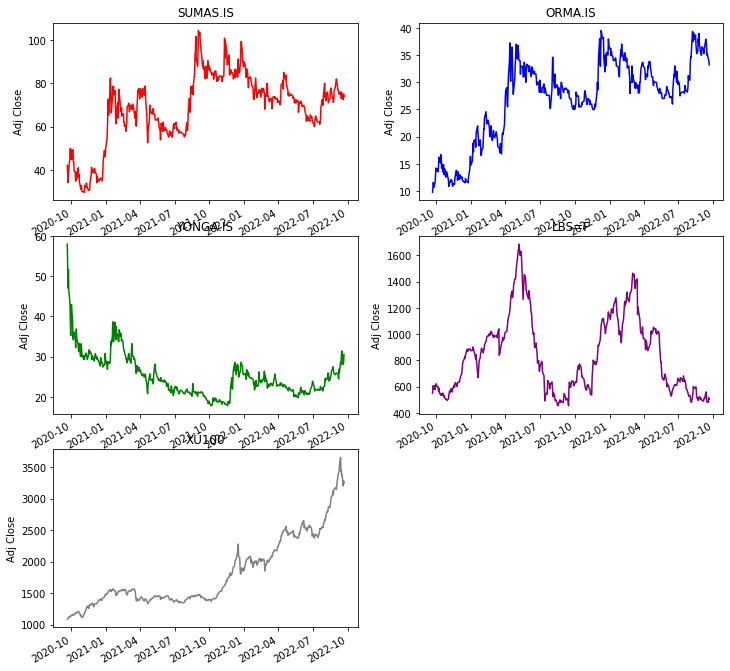

In [85]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
colorlist=['Red','Blue','Green','Purple','Gray','Orange']
for i, company in enumerate(company_list, 1):
    plt.subplot(int(len(company_list)/2)+1, 2, i)
    company['Adj Close'].plot(color=colorlist[i-1])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")

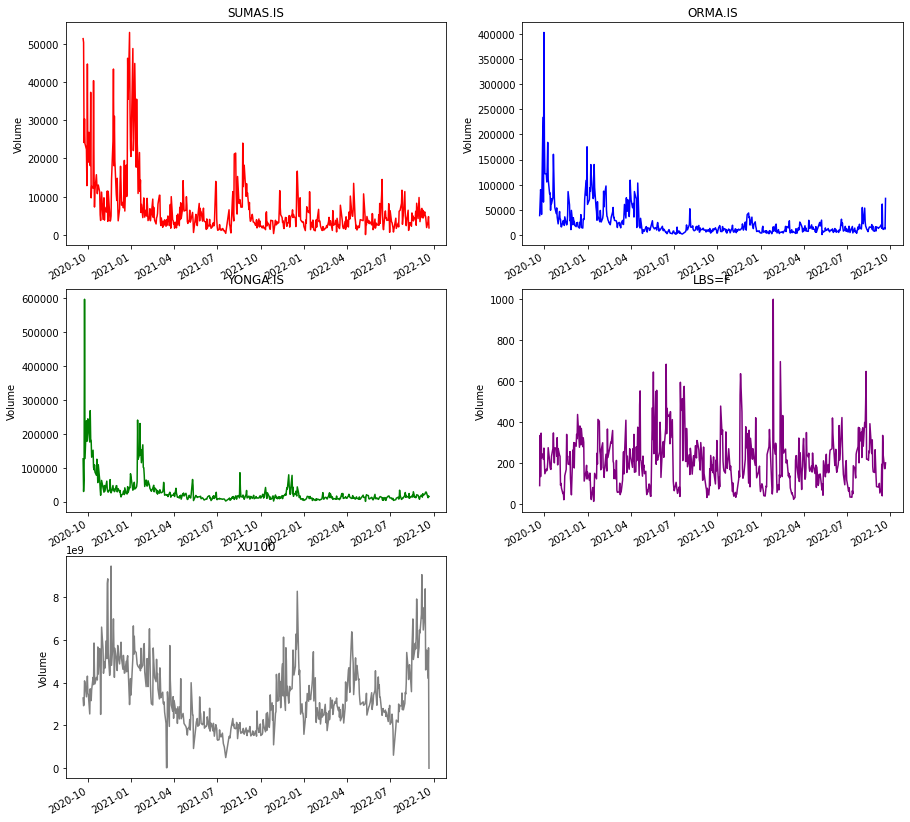

In [86]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
colorlist=['Red','Blue','Green','Purple','Gray','Orange']
for i, company in enumerate(company_list, 1):
    plt.subplot(int(len(company_list)/2)+1, 2, i)
    company['Volume'].plot(color=colorlist[i-1])
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")

In [87]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

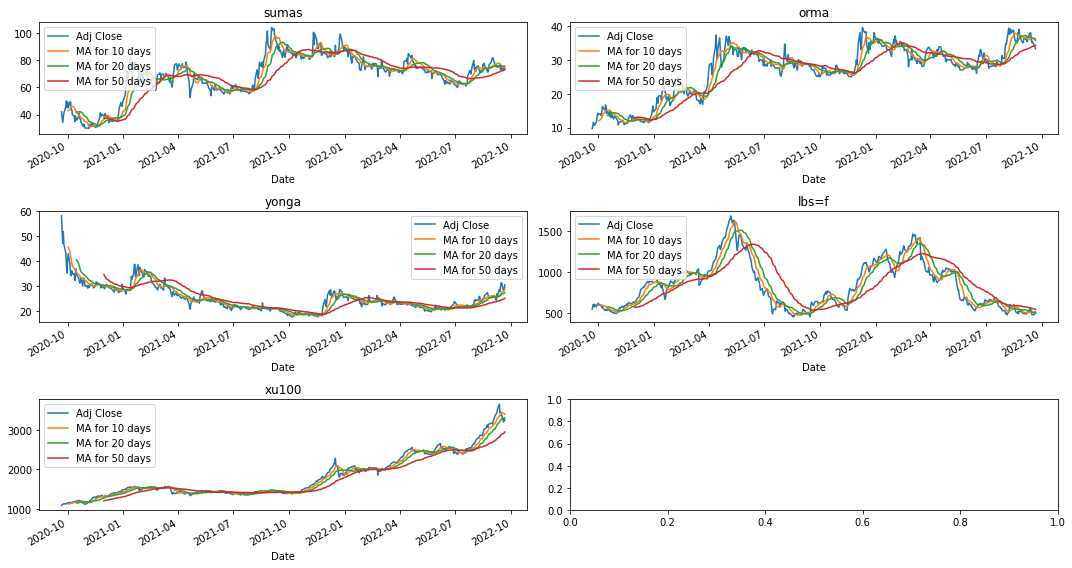

In [88]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

sumas[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('sumas')

orma[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('orma')

yonga[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('yonga')

lbs[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('lbs=f')

xu100[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('xu100')

fig.tight_layout()

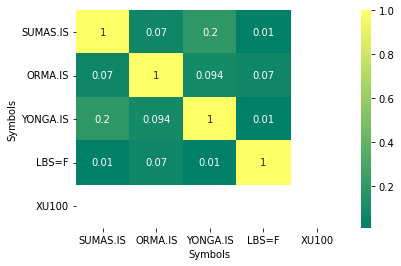

In [90]:
closing_df = DataReader(company_name, 'yahoo', start, end)['Adj Close']

tech_rets = closing_df.pct_change()
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

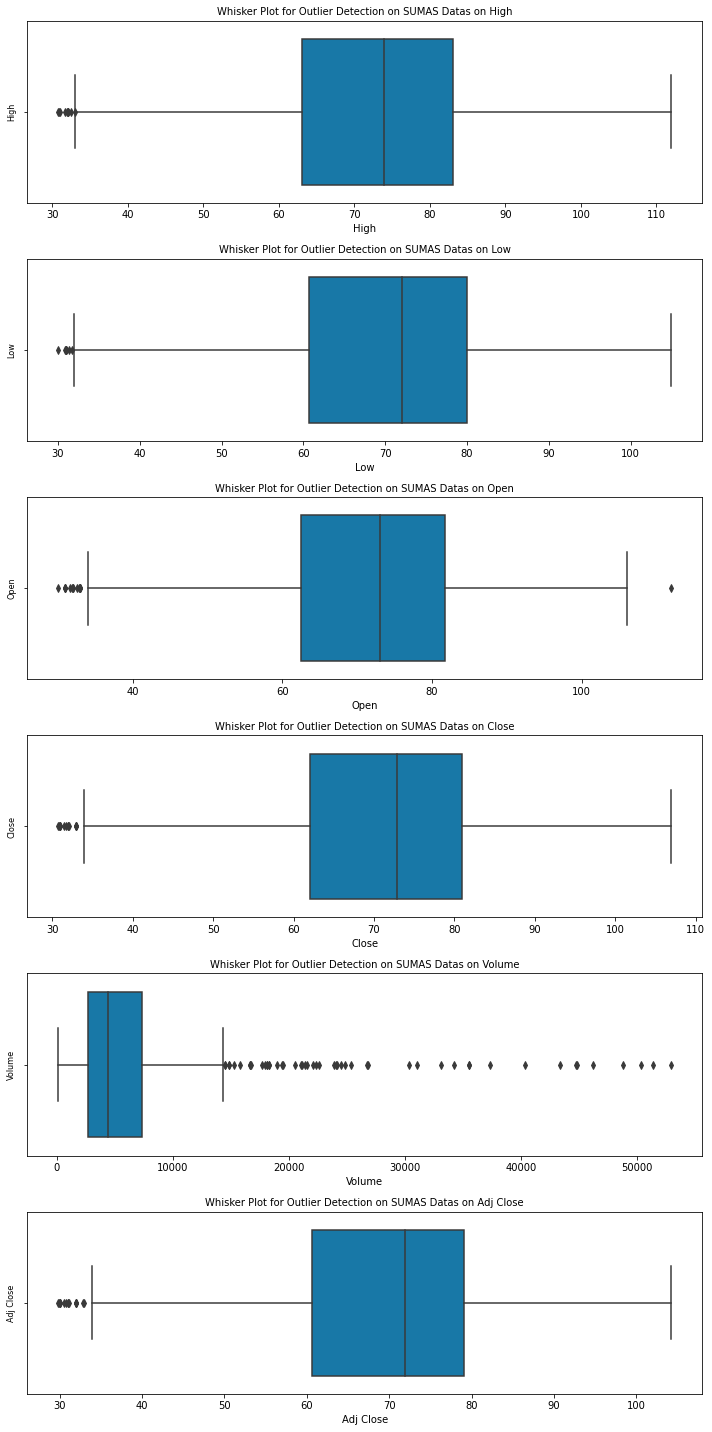

In [92]:
Column_List = ["High", "Low","Open","Close", "Volume","Adj Close"]
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(sumas[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on SUMAS Datas on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

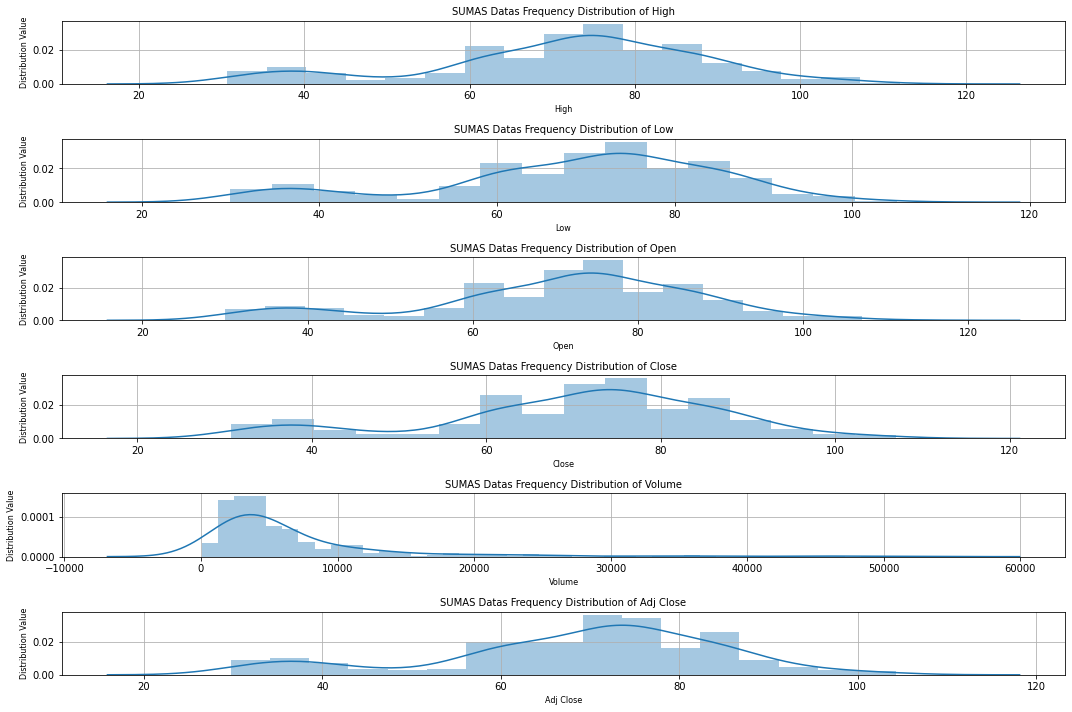

In [93]:
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(sumas[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("SUMAS Datas Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

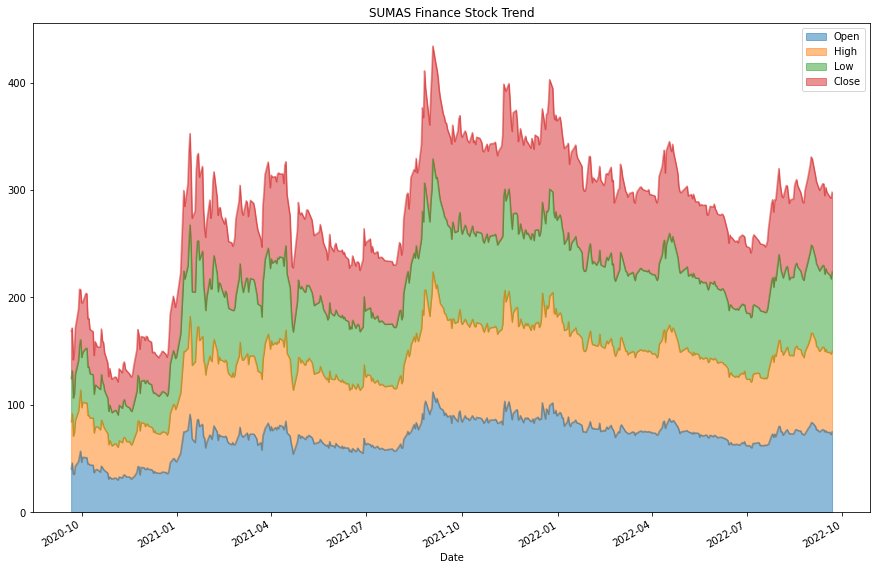

In [94]:
sumas[["Open","High","Low","Close"]].plot.area(figsize=(15,10),alpha=0.5);
plt.title('SUMAS Finance Stock Trend')
plt.show()

##SECOND ANALYSIS

In [3]:
df_final = pd.read_csv("stock_history/SUMAS.IS/SUMAS.IS.csv",index_col='Date')
df_orma = pd.read_csv("stock_history/ORMA.IS/ORMA.IS.csv",index_col='Date')
df_yonga = pd.read_csv("stock_history/YONGA.IS/YONGA.IS.csv",index_col='Date')
df_xu100 = pd.read_csv("stock_history/XU100.IS/XU100.IS.csv",index_col='Date')
df_xu030 = pd.read_csv("stock_history/XU030.IS/XU030.IS.csv",index_col='Date')
df_lbs = pd.read_csv("stock_history/LBS=F/LBS=F.csv",index_col='Date')
df_trdr = pd.read_csv("stock_history/TRY=X/TRY=X.csv",index_col='Date')
df_eur = pd.read_csv("stock_history/EURTRY=X/EURTRY=X.csv",index_col='Date')
df_xusin = pd.read_csv("stock_history/XUSIN.IS/XUSIN.IS.csv",index_col='Date')

In [4]:
def rename_column(com_name : str, dataframe : pd.DataFrame):
    columns_list = dataframe.columns.to_list()
    for i in range(len(columns_list)):
        columns_list[i] = columns_list[i] + '_' + com_name
    columns_list = [item.lower() for item in columns_list]
    dataframe.columns = columns_list

In [5]:
rename_column('sumas', df_final)
rename_column('orma', df_orma)
rename_column('yonga', df_yonga)
rename_column('xu100', df_xu100)
rename_column('xu030', df_xu030)
rename_column('lbs', df_lbs)
rename_column('trdr', df_trdr)
rename_column('eur', df_eur)
rename_column('xusin', df_xusin)

In [6]:
df_final = df_final.merge(df_orma, how="left",on=['Date'])
df_final = df_final.merge(df_yonga, how="left",on=['Date'])
df_final = df_final.merge(df_xu100, how="left",on=['Date'])
df_final = df_final.merge(df_xu030, how="left",on=['Date'])
df_final = df_final.merge(df_lbs, how="left",on=['Date'])
df_final = df_final.merge(df_trdr, how="left",on=['Date'])
df_final = df_final.merge(df_eur, how="left",on=['Date'])
df_final = df_final.merge(df_xusin, how="left",on=['Date'])
df_final = df_final.dropna()

In [7]:
df_final.head(3)

,open_sumas,high_sumas,low_sumas,close_sumas,volume_sumas,open_orma,high_orma,low_orma,close_orma,volume_orma,...,open_eur,high_eur,low_eur,close_eur,volume_eur,open_xusin,high_xusin,low_xusin,close_xusin,volume_xusin
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-09,10.0,10.0,10.0,10.0,82,1.30,1.30,1.25,1.25,4656,...,4.68618,4.69798,4.67366,4.68571,0,125235.101562,126390.000000,124436.000000,125706.500000,444600.0
2018-02-12,10.0,10.0,10.0,10.0,662,1.30,1.30,1.25,1.25,341,...,4.67619,4.69011,4.65792,4.67624,0,126662.898438,127341.601562,126214.203125,126214.203125,528100.0
2018-02-13,8.5,8.5,8.0,8.0,165,1.26,1.26,1.25,1.25,40,...,4.67092,4.71010,4.66517,4.67145,0,126874.898438,127540.203125,126409.703125,126733.500000,496200.0


In [8]:
df_final.isnull().values.any()

False

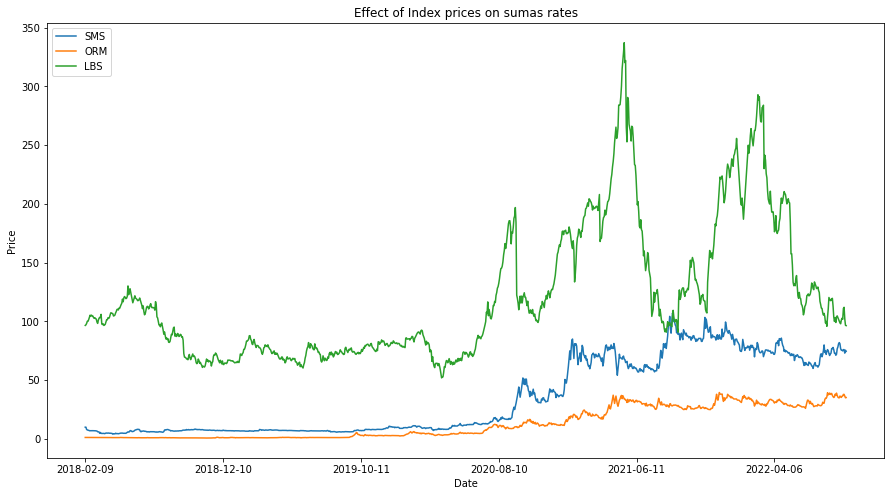

In [9]:
sumas_close = df_final['close_sumas']
orma_close = df_final['close_orma']
lbs_close  = df_final['close_lbs']/5

df_p = pd.DataFrame({'SMS':sumas_close, 'ORM':orma_close, 'LBS':lbs_close})

df_ax = df_p.plot(title='Effect of Index prices on sumas rates',figsize=(15,8))

df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show()

In [10]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

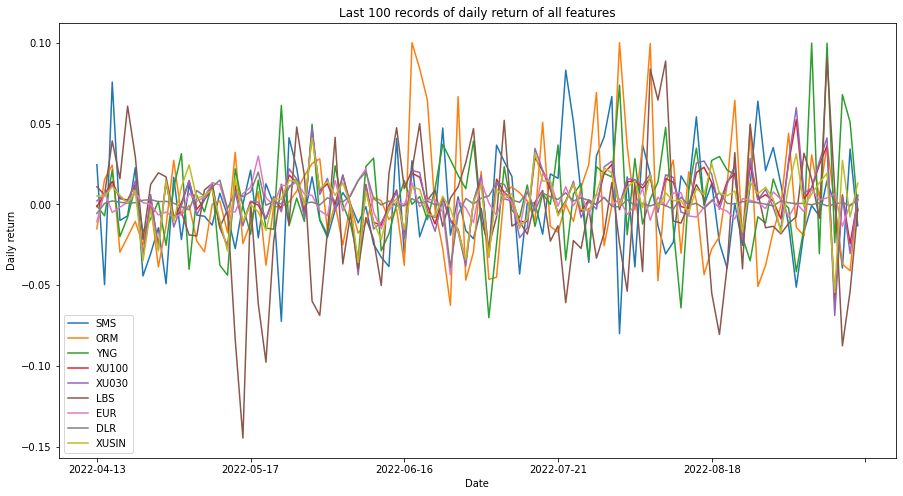

In [11]:
sumas_close = df_final['close_sumas']
orma_close = df_final['close_orma']
yonga_close  = df_final['close_yonga']
xu100_close =  df_final['close_xu100']
xu030_close = df_final['close_xu030']
lbs_close = df_final['close_lbs']
eur_price = df_final['close_eur']
dlr_price = df_final['close_trdr']
xuisn_price = df_final['close_xusin']



sumas_return = compute_daily_returns(sumas_close)
orma_return = compute_daily_returns(orma_close)
yonga_return = compute_daily_returns(yonga_close)
xu100_return = compute_daily_returns(xu100_close)
xu030_return = compute_daily_returns(xu030_close)
lbs_return = compute_daily_returns(lbs_close)
eur_return = compute_daily_returns(eur_price)
dlr_price = compute_daily_returns(dlr_price)
xusin_price = compute_daily_returns(xuisn_price)

df_d = pd.DataFrame({'SMS':sumas_return, 'ORM':orma_return, 'YNG':yonga_return, 'XU100':xu100_return, 'XU030':xu030_return,
                  'LBS':lbs_return,'EUR':eur_return, 'DLR':dlr_price,'XUSIN':xusin_price})

daily_ax = df_d[-100:].plot(title='Last 100 records of daily return of all features', figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

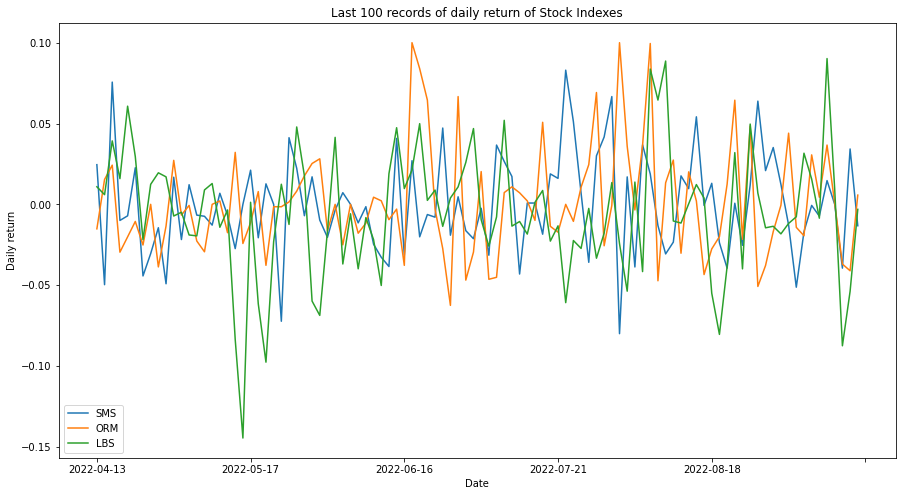

In [12]:
df_s = pd.DataFrame({'SMS':sumas_return, 'ORM':orma_return, 'LBS':lbs_return})

daily_ax = df_s[-100:].plot(title='Last 100 records of daily return of Stock Indexes',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

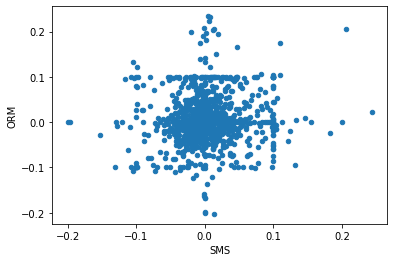

In [13]:
df_d.plot(kind='scatter', x='SMS', y='ORM')

Mean= 0.002766554112906721
Standard Deviation= 0.04377371454540503
Kurtosis= 3.2591576733140717


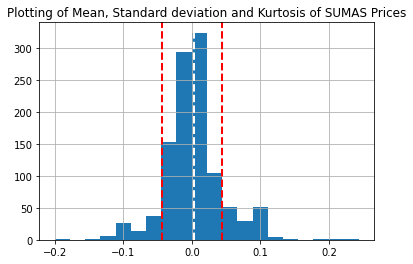

In [14]:
# computing mean,standard deviation and kurtosis of SUMAS ETF daily return

mean=df_d['SMS'].mean()
# computing standard deviation of Gold stock
std=df_d['SMS'].std()
kurt=df_d['SMS'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['SMS'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of SUMAS Prices")
plt.show()

Mean= 0.0007005362699442982
Standard Deviation= 0.03709849995619719
Kurtosis= 13.749583314691469


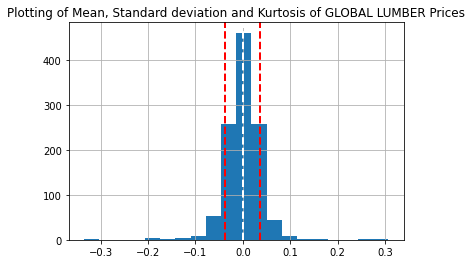

In [15]:
# computing mean,standard deviation and kurtosis of Lumber Index daily return
mean=df_d['LBS'].mean()
# computing standard deviation of Gold stock
std=df_d['LBS'].std()
kurt=df_d['LBS'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['LBS'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of GLOBAL LUMBER Prices")
plt.show()

Mean= 0.00021181256813956054
Standard Deviation= 0.03371421219282966
Kurtosis= 675.0106336878214


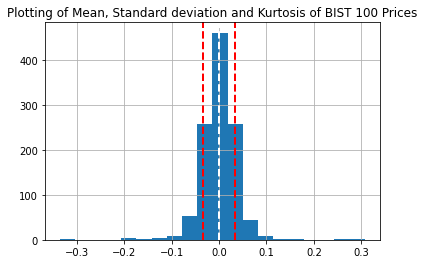

In [16]:
# computing mean,standard deviation and kurtosis of BIST 100 daily return
mean=df_d['XU100'].mean()
# computing standard deviation of Gold stock
std=df_d['XU100'].std()
kurt=df_d['XU100'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['LBS'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of BIST 100 Prices")
plt.show()

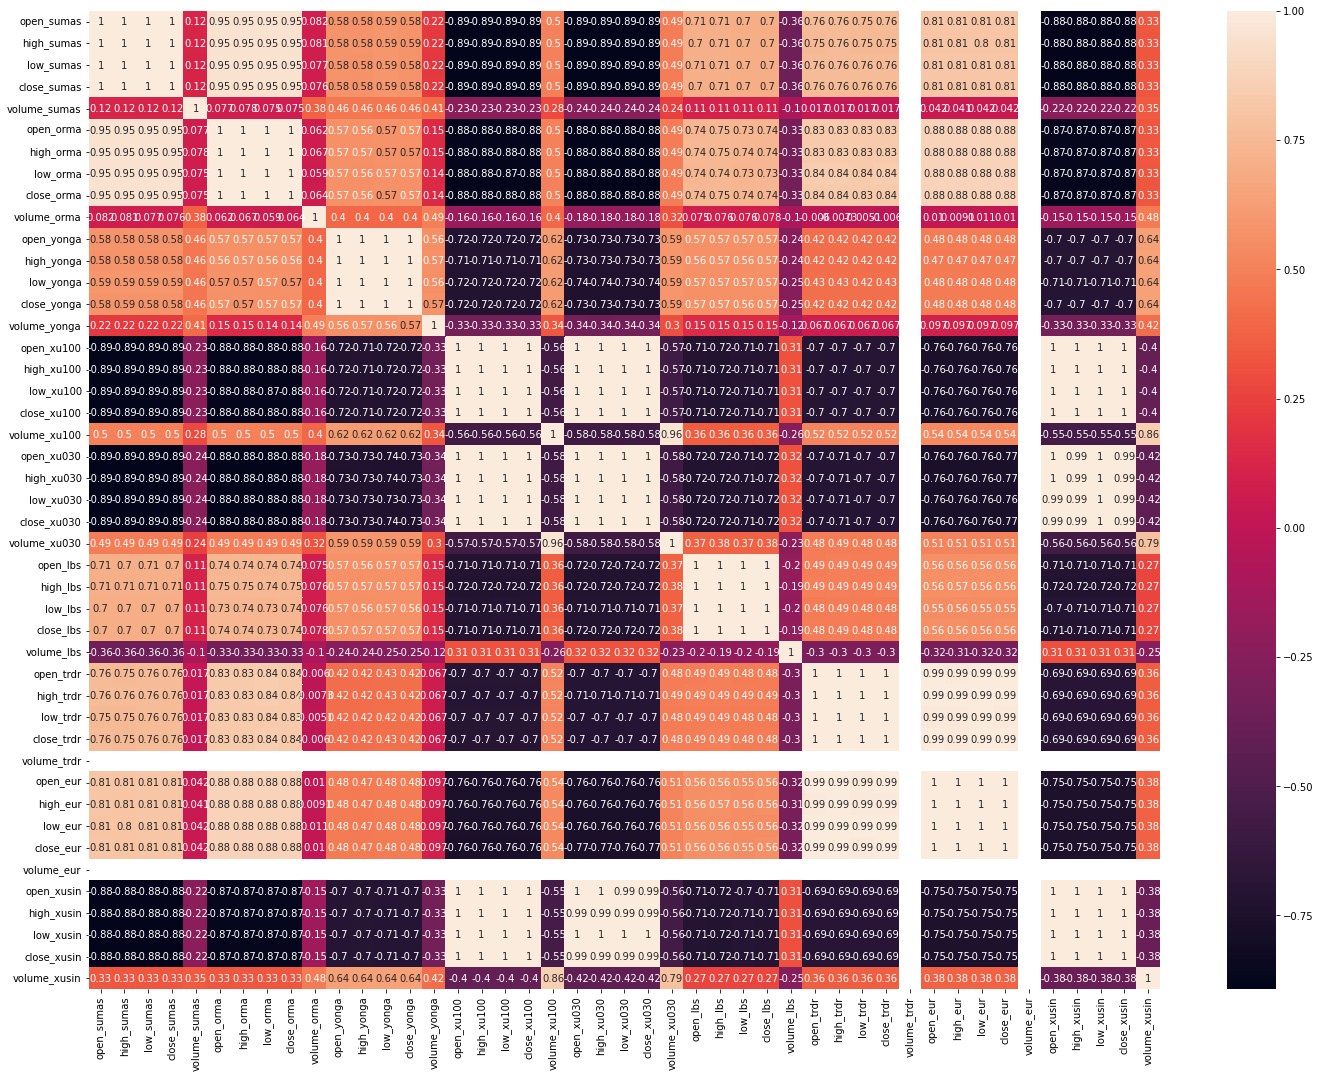

In [17]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df_final.corr(), annot=True) 

In [18]:
X=df_final.drop(['close_sumas'],axis=1)

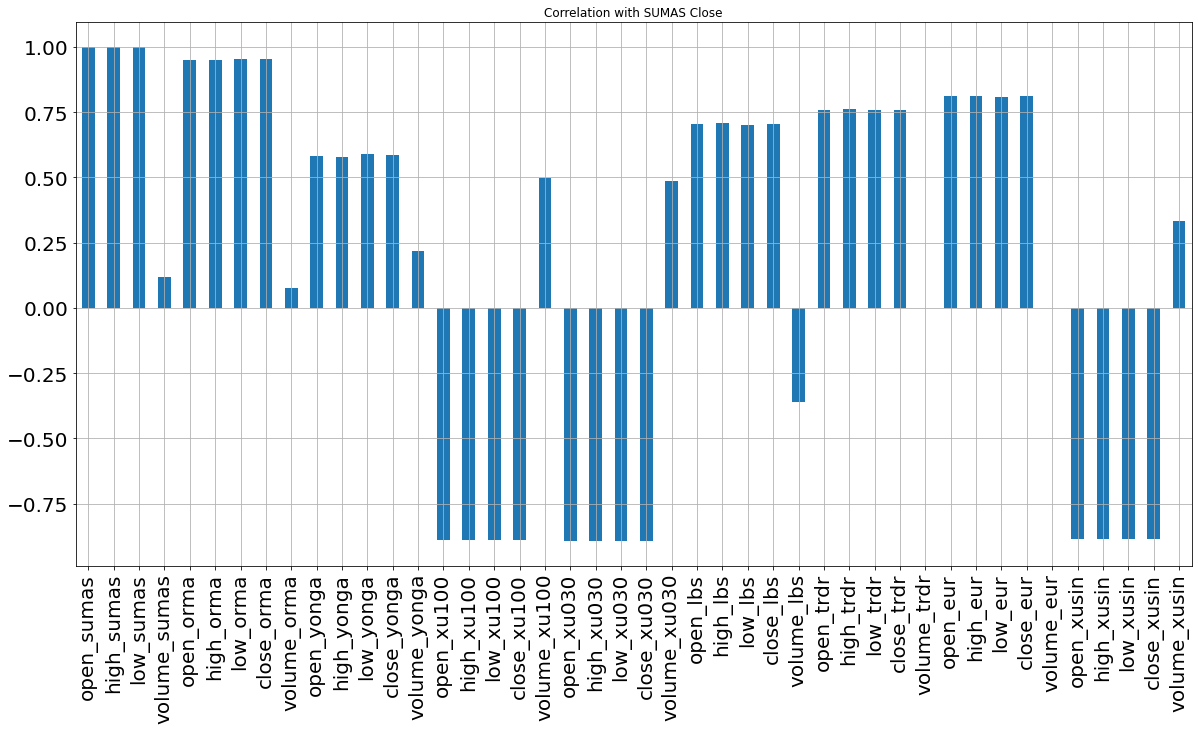

In [19]:
X.corrwith(df_final['close_sumas']).plot.bar(
        figsize = (20, 10), title = "Correlation with SUMAS Close", fontsize = 20,
        rot = 90, grid = True)

In [20]:
corr_matrix=df_final.corr()
coef=corr_matrix["close_sumas"].sort_values(ascending=False)

In [22]:
pos_corr=coef[coef>0]
pos_corr.head(10)

close_sumas    1.000000
high_sumas     0.999290
low_sumas      0.999250
open_sumas     0.998150
low_orma       0.951427
close_orma     0.951280
high_orma      0.950969
open_orma      0.950846
high_eur       0.810330
close_eur      0.809925
Name: close_sumas, dtype: float64

In [23]:
neg_corr=coef[coef<0]
neg_corr.head(10)

volume_lbs    -0.358713
low_xusin     -0.884027
close_xusin   -0.884155
open_xusin    -0.884239
high_xusin    -0.884355
low_xu100     -0.888971
close_xu100   -0.889296
open_xu100    -0.889322
high_xu100    -0.889585
low_xu030     -0.892176
Name: close_sumas, dtype: float64

In [24]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

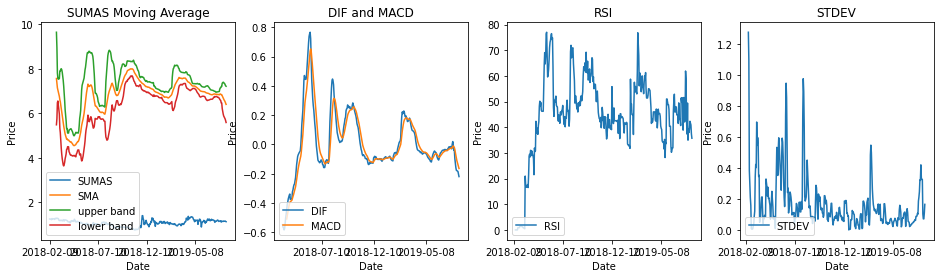

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Calculate Simple Moving Average for SUMAS
SMA_SMS = calculate_SMA(sumas_close)

orma_close[:365].plot(title='SUMAS Moving Average', label='SUMAS', ax=axes[0])

SMA_SMS[:365].plot(label="SMA",ax=axes[0])

# Calculate Bollinger Bands for SUMAS
upper_band, lower_band = calculate_BB(sumas_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])

# Calculate MACD for SUMAS
DIF, MACD = calculate_MACD(sumas_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for GLD
RSI = calculate_RSI(sumas_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(sumas_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[3])

Open_Close=df_final.open_sumas - df_final.close_sumas

High_Low=df_final.high_sumas-df_final.low_sumas

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')

axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')

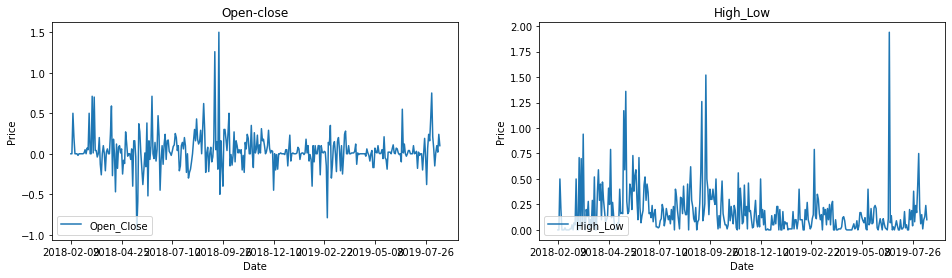

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
Open_Close=df_final.open_sumas - df_final.close_sumas
Open_Close[:365].plot(title='Open-close',label='Open_Close', ax=axes[0])

High_Low=df_final.high_sumas-df_final.low_sumas
High_Low[:365].plot(title='High_Low',label='High_Low', ax=axes[1])
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')

axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

In [27]:
test = df_final
test['SMA'] = SMA_SMS
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI
test['STDEV'] = STDEV
test['Open_Close']=Open_Close
test['High_Low']=High_Low

# Dropping first 33 records from the data as it has null values because of introduction of technical indicators
test = test[33:]

# Target column
target_sumas_close = pd.DataFrame(test['close_sumas'])

display(test.head())

,open_sumas,high_sumas,low_sumas,close_sumas,volume_sumas,open_orma,high_orma,low_orma,close_orma,volume_orma,...,volume_xusin,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-29,5.00,5.00,4.97,5.00,178,1.21,1.21,1.21,1.21,5195,...,432200.0,4.982667,5.906307,4.059026,-0.440874,-0.508940,31.014971,0.134907,0.00,0.03
2018-04-02,4.78,4.99,4.70,4.99,4120,1.21,1.21,1.20,1.20,5008,...,462800.0,4.916000,5.653672,4.178328,-0.410062,-0.486785,30.895152,0.042071,-0.21,0.29
2018-04-03,4.85,4.85,4.83,4.83,4114,1.18,1.18,1.18,1.18,1035,...,497600.0,4.841333,5.307066,4.375601,-0.393271,-0.466325,28.976187,0.076354,0.02,0.02
2018-04-04,4.95,4.95,4.43,4.89,2564,1.18,1.18,1.18,1.18,4083,...,523900.0,4.848667,5.313724,4.383609,-0.371078,-0.445870,30.705486,0.071903,0.06,0.52
2018-04-05,4.79,4.79,4.79,4.79,3264,1.17,1.17,1.10,1.16,12957,...,508600.0,4.802667,5.109770,4.495563,-0.357030,-0.427068,29.426074,0.093808,0.00,0.00


In [28]:
df_final.columns

Index(['open_sumas', 'high_sumas', 'low_sumas', 'close_sumas', 'volume_sumas',
       'open_orma', 'high_orma', 'low_orma', 'close_orma', 'volume_orma',
       'open_yonga', 'high_yonga', 'low_yonga', 'close_yonga', 'volume_yonga',
       'open_xu100', 'high_xu100', 'low_xu100', 'close_xu100', 'volume_xu100',
       'open_xu030', 'high_xu030', 'low_xu030', 'close_xu030', 'volume_xu030',
       'open_lbs', 'high_lbs', 'low_lbs', 'close_lbs', 'volume_lbs',
       'open_trdr', 'high_trdr', 'low_trdr', 'close_trdr', 'volume_trdr',
       'open_eur', 'high_eur', 'low_eur', 'close_eur', 'volume_eur',
       'open_xusin', 'high_xusin', 'low_xusin', 'close_xusin', 'volume_xusin',
       'SMA', 'Upper_band', 'Lower_band', 'DIF', 'MACD', 'RSI', 'STDEV',
       'Open_Close', 'High_Low'],
      dtype='object')

In [29]:
# selecting Feature Columns
feature_columns = ['open_sumas', 'high_sumas', 'low_sumas', 'close_sumas', 'volume_sumas',
       'open_orma', 'high_orma', 'low_orma', 'close_orma', 'volume_orma',
       'open_yonga', 'high_yonga', 'low_yonga', 'close_yonga', 'volume_yonga',
       'open_xu100', 'high_xu100', 'low_xu100', 'close_xu100', 'volume_xu100',
       'open_xu030', 'high_xu030', 'low_xu030', 'close_xu030', 'volume_xu030',
       'open_lbs', 'high_lbs', 'low_lbs', 'close_lbs', 'volume_lbs',
       'open_trdr', 'high_trdr', 'low_trdr', 'close_trdr', 'volume_trdr',
       'open_eur', 'high_eur', 'low_eur', 'close_eur', 'volume_eur',
       'open_xusin', 'high_xusin', 'low_xusin', 'close_xusin', 'volume_xusin',
       'SMA', 'Upper_band', 'Lower_band', 'DIF', 'MACD', 'RSI', 'STDEV',
       'Open_Close', 'High_Low']


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,open_sumas,high_sumas,low_sumas,close_sumas,volume_sumas,open_orma,high_orma,low_orma,close_orma,volume_orma,...,volume_xusin,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-29,0.007697,0.006223,0.009113,0.009132,0.002282,0.010937,0.010937,0.011762,0.011616,0.012895,...,0.140512,0.004715,0.008502,0.002448,0.203565,0.169530,0.140725,0.013721,0.452727,0.001690
2018-04-02,0.005657,0.006130,0.006439,0.009034,0.052817,0.010937,0.010937,0.011500,0.011358,0.012431,...,0.150460,0.003995,0.006160,0.003898,0.205686,0.171343,0.138952,0.004279,0.445091,0.016338
2018-04-03,0.006306,0.004830,0.007727,0.007480,0.052740,0.010191,0.010191,0.010978,0.010842,0.002569,...,0.161774,0.003189,0.002947,0.006297,0.206843,0.173017,0.110559,0.007766,0.453455,0.001127
2018-04-04,0.007234,0.005758,0.003764,0.008063,0.032870,0.010191,0.010191,0.010978,0.010842,0.010135,...,0.170324,0.003268,0.003009,0.006394,0.208371,0.174691,0.136146,0.007313,0.454909,0.029296
2018-04-05,0.005750,0.004272,0.007330,0.007092,0.041843,0.009943,0.009943,0.008887,0.010325,0.032163,...,0.165350,0.002772,0.001119,0.007755,0.209338,0.176229,0.117216,0.009541,0.452727,0.000000


In [31]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_sumas_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_sumas_close = target_sumas_close.shift(-1)
validation_y = target_sumas_close[-90:-1]
target_sumas_close = target_sumas_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_sumas_close.shape)
display(target_sumas_close.tail())

,open_sumas,high_sumas,low_sumas,close_sumas,volume_sumas,open_orma,high_orma,low_orma,close_orma,volume_orma,...,volume_xusin,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-29,0.007697,0.006223,0.009113,0.009132,0.002282,0.010937,0.010937,0.011762,0.011616,0.012895,...,0.140512,0.004715,0.008502,0.002448,0.203565,0.169530,0.140725,0.013721,0.452727,0.001690
2018-04-02,0.005657,0.006130,0.006439,0.009034,0.052817,0.010937,0.010937,0.011500,0.011358,0.012431,...,0.150460,0.003995,0.006160,0.003898,0.205686,0.171343,0.138952,0.004279,0.445091,0.016338
2018-04-03,0.006306,0.004830,0.007727,0.007480,0.052740,0.010191,0.010191,0.010978,0.010842,0.002569,...,0.161774,0.003189,0.002947,0.006297,0.206843,0.173017,0.110559,0.007766,0.453455,0.001127
2018-04-04,0.007234,0.005758,0.003764,0.008063,0.032870,0.010191,0.010191,0.010978,0.010842,0.010135,...,0.170324,0.003268,0.003009,0.006394,0.208371,0.174691,0.136146,0.007313,0.454909,0.029296
2018-04-05,0.005750,0.004272,0.007330,0.007092,0.041843,0.009943,0.009943,0.008887,0.010325,0.032163,...,0.165350,0.002772,0.001119,0.007755,0.209338,0.176229,0.117216,0.009541,0.452727,0.000000


Shape of features :  (1072, 54)
Shape of target :  (1072, 1)


,open_sumas,high_sumas,low_sumas,close_sumas,volume_sumas,open_orma,high_orma,low_orma,close_orma,volume_orma,...,volume_xusin,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-09,0.656867,0.656357,0.700842,0.688168,0.057137,0.889137,0.889137,0.930998,0.923593,0.038991,...,0.546409,0.774928,0.722089,0.800729,0.330434,0.359128,0.427189,0.250750,0.456364,0.011267
2022-09-12,0.675415,0.674933,0.711243,0.698854,0.077392,0.913000,0.922446,0.960272,0.958183,0.050725,...,0.669333,0.773596,0.720440,0.799893,0.320929,0.350214,0.458594,0.072598,0.489091,0.064789
2022-09-13,0.674488,0.674004,0.712729,0.698854,0.066086,0.942332,0.942332,0.970727,0.958699,0.033195,...,0.804805,0.773596,0.720440,0.799893,0.312490,0.341078,0.458594,0.046553,0.485455,0.050704
2022-09-14,0.655940,0.655429,0.673105,0.669711,0.060881,0.920457,0.920457,0.871929,0.922561,0.152644,...,0.687896,0.773596,0.720440,0.799893,0.288504,0.328068,0.366861,0.126502,0.521818,0.163380
2022-09-15,0.665677,0.665181,0.703319,0.693997,0.042395,0.888143,0.888143,0.894929,0.883841,0.031825,...,0.607595,0.775360,0.719940,0.804520,0.282822,0.316310,0.442651,0.126910,0.469091,0.050704


,close_sumas
Date,
2022-09-09,76.0
2022-09-12,76.0
2022-09-13,73.0
2022-09-14,75.5
2022-09-15,74.5



 -----After process------ 

Shape of features :  (982, 54)
Shape of target :  (982, 1)


,close_sumas
Date,
2022-04-21,82.000000
2022-04-22,79.500000
2022-04-25,78.349998
2022-04-26,74.500000
2022-04-27,75.750000


In [39]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_sumas_close[:len(train_index)].values.ravel(), target_sumas_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
       

In [40]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  7.212144194403475
R2 score:  -0.8095205790243285


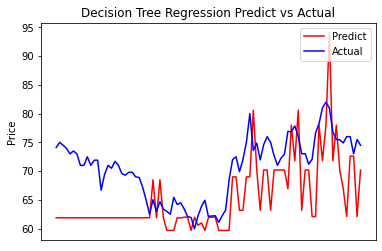

In [41]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

RMSE:  2.1164362995698593
R2 score:  0.8441721324345761


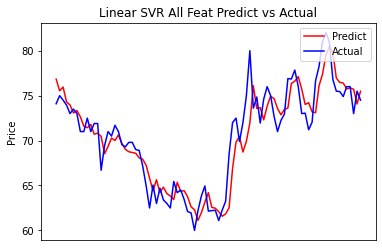

In [42]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')

RMSE:  2.052665599461874
R2 score:  0.8534212099517331


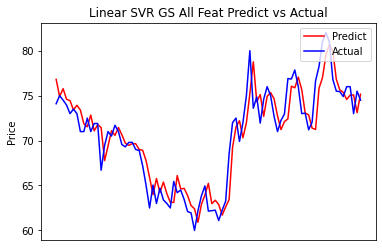

In [43]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)

lsvr_grid_search_feat.fit(X_train, y_train)

validate_result(lsvr_grid_search_feat,'Linear SVR GS All Feat')

In [44]:
solution_models['SVR All Feat'] = lsvr_grid_search_feat

RMSE:  3.211223561480005
R2 score:  0.6412633009026176


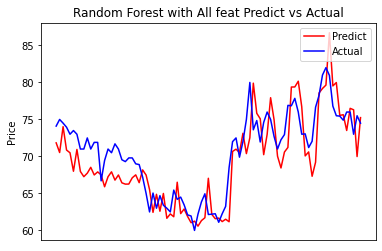

In [45]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')

In [46]:
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)

grid_search_RF_feat.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 50, 100]})

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 15}
RMSE:  3.102122327886
R2 score:  0.6652253508525977


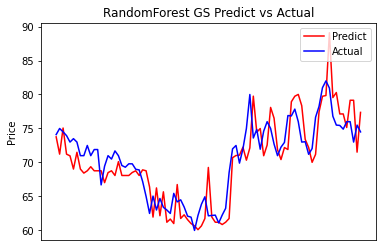

In [47]:
print(grid_search_RF_feat.best_params_)
validate_result(grid_search_RF_feat,'RandomForest GS')

In [48]:
solution_models['Random_Forest with Feat'] = random_forest_clf_feat

RMSE:  2.05579490356327
R2 score:  0.8529739483550361


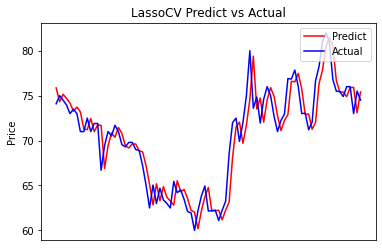

RMSE:  2.1466783413224144
R2 score:  0.8396870250607216


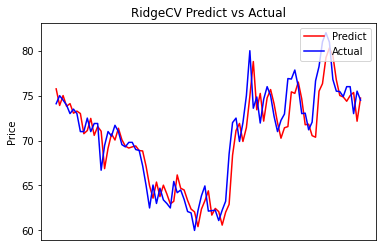

In [49]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf_feat = lasso_clf.fit(X_train,y_train)
validate_result(lasso_clf_feat,'LassoCV')
solution_models['LassoCV All feat'] = lasso_clf_feat

ridge_clf_feat = ridge_clf.fit(X_train,y_train)
validate_result(ridge_clf_feat,'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat

RMSE:  2.1528309592091297
R2 score:  0.8387667586711762


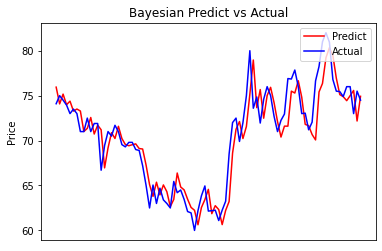

In [50]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train,y_train)
validate_result(bay_feat,'Bayesian')
solution_models['Bay All Feat'] = bay_feat

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


RMSE:  3.272142555804203
R2 score:  0.6275232609180661


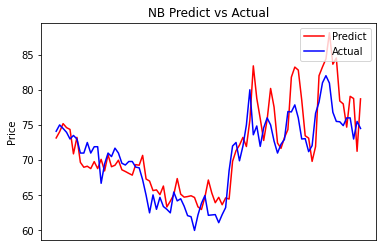

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train,y_train)
validate_result(GB_feat,'NB')
solution_models['GB All Feat'] = GB_feat

RMSE:  2.2518249657801293
R2 score:  0.8235978053563421


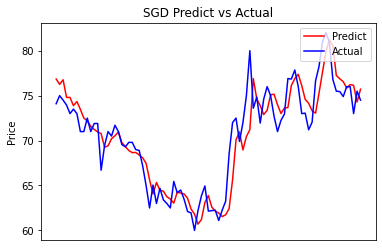

In [54]:
from sklearn.linear_model import SGDRegressor
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_feat = sgd.fit(X_train,y_train)
validate_result(sgd_feat,'SGD')
solution_models['SGD All Feat'] = sgd_feat

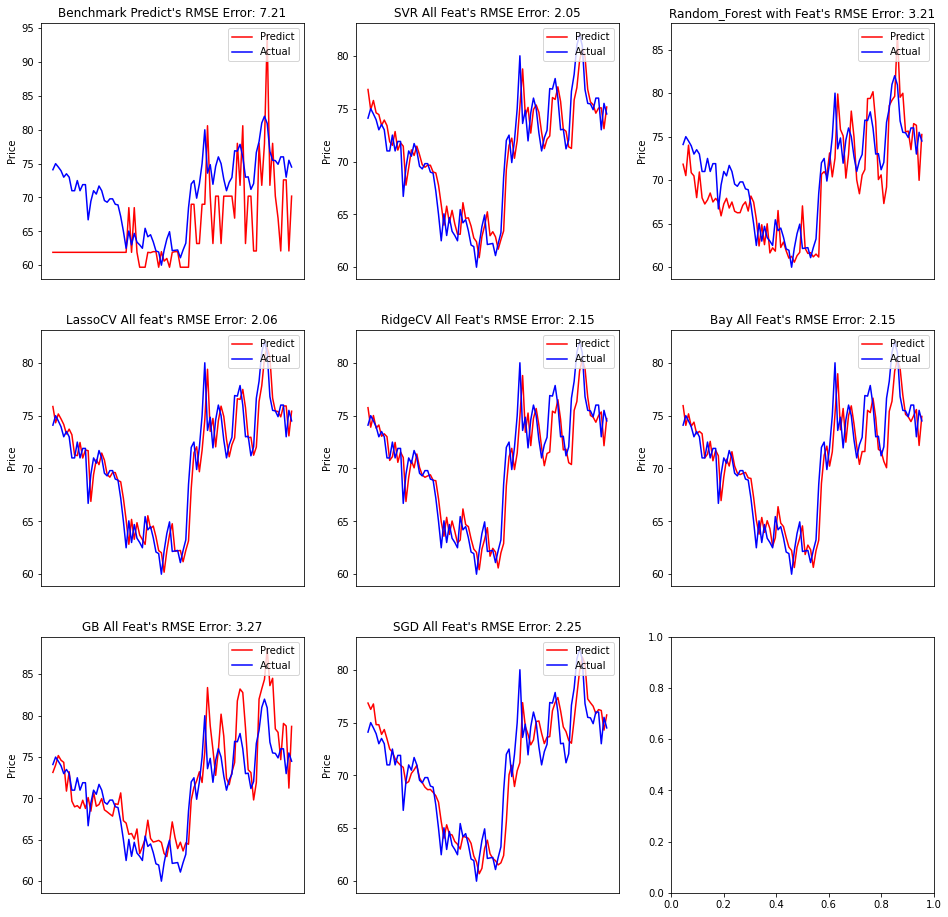

In [55]:
RMSE_scores = {}
def model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_predicted = benchmark_dt.predict(validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_predicted))
    RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_predicted,'r', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

           
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'r', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

model_review(solution_models)

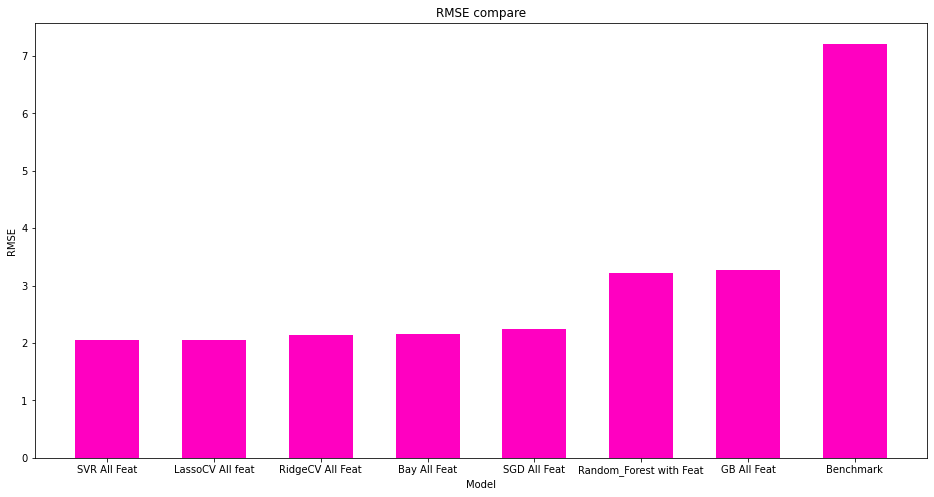

In [56]:
model_names = []
model_values = []
for name, value in RMSE_scores.items():
    model_names.append(name)
    model_values.append(value)

model_values = np.array(model_values)
model_names = np.array(model_names)

indices = np.argsort(model_values)
columns = model_names[indices[:8]]
values = model_values[indices][:8]

fig = plt.figure(figsize = (16,8))
plt.bar(np.arange(8), values ,width = 0.6, align="center", color = '#ff00c1')
plt.xticks(np.arange(8), columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare')   
plt.show()

In [57]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(lasso_clf_feat)
sfm.fit(feature_minmax_transform, target_sumas_close.values.ravel())
display(feature_minmax_transform.head())
sup = sfm.get_support()
zipped = zip(feature_minmax_transform,sup)
print(*zipped)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.079e+02, tolerance: 1.014e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


,open_sumas,high_sumas,low_sumas,close_sumas,volume_sumas,open_orma,high_orma,low_orma,close_orma,volume_orma,...,volume_xusin,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-29,0.007697,0.006223,0.009113,0.009132,0.002282,0.010937,0.010937,0.011762,0.011616,0.012895,...,0.140512,0.004715,0.008502,0.002448,0.203565,0.169530,0.140725,0.013721,0.452727,0.001690
2018-04-02,0.005657,0.006130,0.006439,0.009034,0.052817,0.010937,0.010937,0.011500,0.011358,0.012431,...,0.150460,0.003995,0.006160,0.003898,0.205686,0.171343,0.138952,0.004279,0.445091,0.016338
2018-04-03,0.006306,0.004830,0.007727,0.007480,0.052740,0.010191,0.010191,0.010978,0.010842,0.002569,...,0.161774,0.003189,0.002947,0.006297,0.206843,0.173017,0.110559,0.007766,0.453455,0.001127
2018-04-04,0.007234,0.005758,0.003764,0.008063,0.032870,0.010191,0.010191,0.010978,0.010842,0.010135,...,0.170324,0.003268,0.003009,0.006394,0.208371,0.174691,0.136146,0.007313,0.454909,0.029296
2018-04-05,0.005750,0.004272,0.007330,0.007092,0.041843,0.009943,0.009943,0.008887,0.010325,0.032163,...,0.165350,0.002772,0.001119,0.007755,0.209338,0.176229,0.117216,0.009541,0.452727,0.000000


('open_sumas', False) ('high_sumas', True) ('low_sumas', True) ('close_sumas', True) ('volume_sumas', True) ('open_orma', False) ('high_orma', False) ('low_orma', True) ('close_orma', False) ('volume_orma', False) ('open_yonga', False) ('high_yonga', False) ('low_yonga', False) ('close_yonga', False) ('volume_yonga', False) ('open_xu100', False) ('high_xu100', False) ('low_xu100', False) ('close_xu100', False) ('volume_xu100', True) ('open_xu030', False) ('high_xu030', True) ('low_xu030', False) ('close_xu030', False) ('volume_xu030', False) ('open_lbs', False) ('high_lbs', False) ('low_lbs', True) ('close_lbs', False) ('volume_lbs', False) ('open_trdr', False) ('high_trdr', False) ('low_trdr', False) ('close_trdr', False) ('volume_trdr', False) ('open_eur', False) ('high_eur', False) ('low_eur', False) ('close_eur', False) ('volume_eur', False) ('open_xusin', False) ('high_xusin', False) ('low_xusin', False) ('close_xusin', False) ('volume_xusin', False) ('SMA', False) ('Upper_band', 

In [59]:
# Selecting Features which supports Model building process

feature_selected = feature_minmax_transform[['high_sumas','low_sumas','close_sumas','volume_sumas','low_orma','volume_xu100','high_xu030','low_lbs','MACD','Open_Close']]
feature_selected_validation_X = validation_X[['high_sumas','low_sumas','close_sumas','volume_sumas','low_orma','volume_xu100','high_xu030','low_lbs','MACD','Open_Close']]
display(feature_selected.head())
display(feature_selected_validation_X.head())

,high_sumas,low_sumas,close_sumas,volume_sumas,low_orma,volume_xu100,high_xu030,low_lbs,MACD,Open_Close
Date,,,,,,,,,,
2018-03-29,0.006223,0.009113,0.009132,0.002282,0.011762,0.105805,0.929495,0.185220,0.169530,0.452727
2018-04-02,0.006130,0.006439,0.009034,0.052817,0.011500,0.069837,0.931774,0.186005,0.171343,0.445091
2018-04-03,0.004830,0.007727,0.007480,0.052740,0.010978,0.099771,0.927180,0.186719,0.173017,0.453455
2018-04-04,0.005758,0.003764,0.008063,0.032870,0.010978,0.109749,0.926860,0.193145,0.174691,0.454909
2018-04-05,0.004272,0.007330,0.007092,0.041843,0.008887,0.139887,0.933422,0.196787,0.176229,0.452727


,high_sumas,low_sumas,close_sumas,volume_sumas,low_orma,volume_xu100,high_xu030,low_lbs,MACD,Open_Close
Date,,,,,,,,,,
2022-04-28,0.663323,0.687964,0.696425,0.040818,0.769472,0.337018,0.010533,0.548733,0.322531,0.370909
2022-04-29,0.654964,0.690441,0.680396,0.051125,0.763722,0.314489,0.010193,0.550875,0.303133,0.480000
2022-05-05,0.679112,0.702823,0.689139,0.047715,0.751176,0.327906,0.010525,0.530025,0.282986,0.492727
2022-05-06,0.656357,0.654284,0.684282,0.137658,0.745949,0.311210,0.010353,0.523742,0.262611,0.470909
2022-05-09,0.647070,0.692422,0.678939,0.064624,0.723471,0.317525,0.010362,0.516601,0.242324,0.452727


In [60]:
for train_index, test_index in ts_split.split(feature_selected):
       X_train, X_test = feature_selected[:len(train_index)], feature_selected[len(train_index): (len(train_index)+len(test_index))]
       y_train, y_test = target_sumas_close[:len(train_index)].values.ravel(), target_sumas_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [61]:
def feature_selected_validate_result(model, model_name):
    predicted = model.predict(feature_selected_validation_X)
    
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    R2_score = r2_score(validation_y, predicted)
    
    print(model_name + '\n')
    print('RMSE: ', RSME_score)
    print('R2 score: ', R2_score)
    print('----------------------')


print('---------Benchmark-------------')  
dt = DecisionTreeRegressor(random_state=0)
benchmark_dt_fs = dt.fit(X_train,y_train)
feature_selected_validate_result(benchmark_dt_fs, 'Decision Tree')

feature_selected_solution_models = {}
 
print('--------Solution Models--------------')  
# Random Forest
random_forest_clf_fs = RandomForestRegressor(random_state=0,
                                             max_depth=3,
                                             max_features='auto',
                                             n_estimators=10
)
random_forest_parameters = {
    'n_estimators':[10, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[3, 5, 7],
}
grid_search_RF_fs = GridSearchCV(estimator=random_forest_clf_fs,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)
grid_search_RF_fs.fit(X_train, y_train)
feature_selected_validate_result(grid_search_RF_fs,'Feature selected RandomForest GS')
feature_selected_solution_models['FS_RandomForest'] = grid_search_RF_fs

# Linear SVR
linear_svr_fs = SVR(
                          C=50.0,
                          epsilon=0,kernel='linear')
linear_svr_clf_fs = linear_svr_fs.fit(X_train,y_train)
feature_selected_validate_result(linear_svr_clf_fs,'Feature selected LSVR')
feature_selected_solution_models['FS_LSVR'] = linear_svr_clf_fs


# lasso
lasso_fs = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
lasso_clf_fs = lasso_fs.fit(X_train,y_train)
feature_selected_validate_result(lasso_clf_fs,'Feature selected LassoCV')
feature_selected_solution_models['FS_Lasso'] = lasso_clf_fs

# Ridge
ridge_fs = RidgeCV(gcv_mode='auto')
ridge_clf_fs = ridge_fs.fit(X_train,y_train)
feature_selected_validate_result(ridge_clf_fs,'Feature selected RidgeCV')
feature_selected_solution_models['FS_RidgeCV'] = ridge_clf_fs

# bayesian ridge
bay = linear_model.BayesianRidge()
bay_feat_fs = bay.fit(X_train,y_train)
feature_selected_validate_result(bay_feat_fs,'Feature selected BayRidge')
feature_selected_solution_models['Bay_Ridge'] = bay_feat_fs

#Gradient Boosting
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_fs = regr.fit(X_train,y_train)
feature_selected_validate_result(GB_fs,'Feature selected GB')
feature_selected_solution_models['GB_FS'] = GB_fs

#SGD

sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_fs = sgd.fit(X_train,y_train)
feature_selected_validate_result(sgd_fs,'Feature selected SGD')
feature_selected_solution_models['sgd_fs'] = sgd_fs

---------Benchmark-------------
Decision Tree

RMSE:  5.275393325294165
R2 score:  0.031846064115017225
----------------------
--------Solution Models--------------
Feature selected RandomForest GS

RMSE:  4.358658568359304
R2 score:  0.3390928886636738
----------------------
Feature selected LSVR

RMSE:  2.028713475989228
R2 score:  0.8568220458769052
----------------------
Feature selected LassoCV

RMSE:  2.0607350980730677
R2 score:  0.8522664750490015
----------------------
Feature selected RidgeCV

RMSE:  2.149148722555275
R2 score:  0.8393178388313643
----------------------
Feature selected BayRidge

RMSE:  2.119031346615603
R2 score:  0.8437897646202642
----------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Feature selected GB

RMSE:  4.749938490055249
R2 score:  0.21510656649440707
----------------------
Feature selected SGD

RMSE:  2.3681613500313974
R2 score:  0.8048999853273127
----------------------


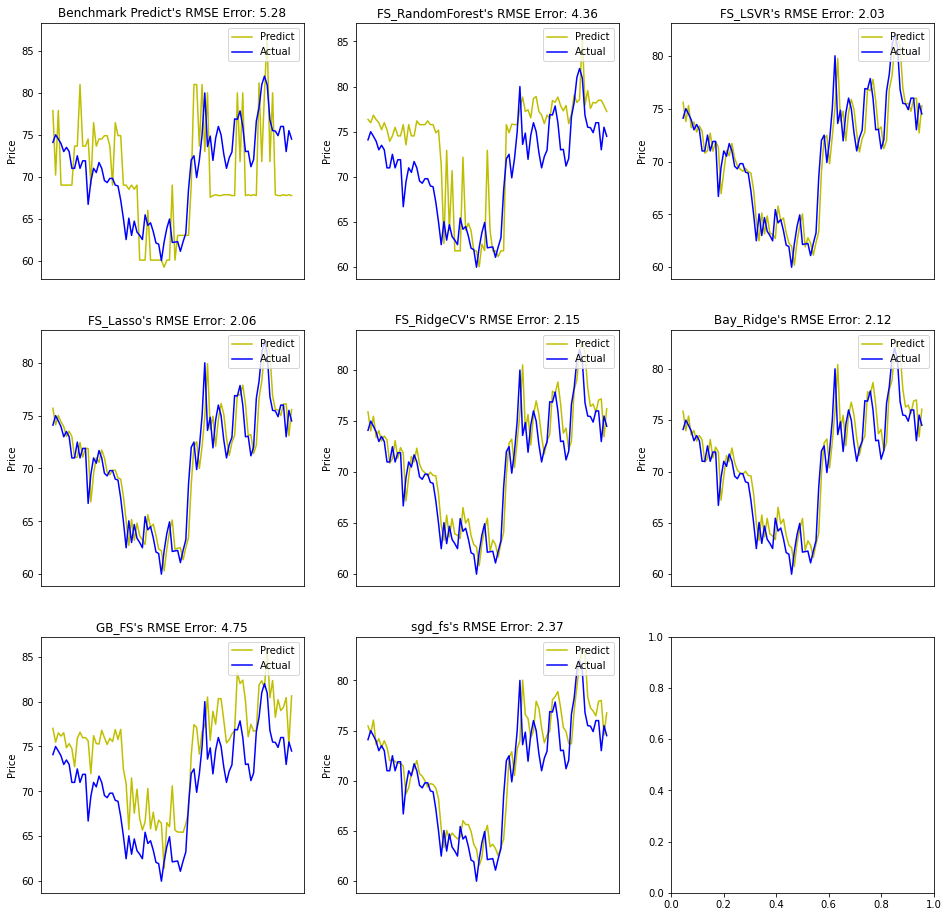

In [62]:
FS_RMSE_scores = {}

def fs_model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_dt_predicted = benchmark_dt_fs.predict(feature_selected_validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_dt_predicted))
    FS_RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_dt_predicted,'y', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(feature_selected_validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

        R2_score = r2_score(validation_y, predicted)
    
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'y', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        FS_RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

fs_model_review(feature_selected_solution_models)

In [63]:
# Choosing the top three performing models to ensemble them
ensemble_solution_models = [lasso_clf_feat, bay_feat, ridge_clf_feat]
class EnsembleSolution:
    models = []
    def __init__(self, models):
        self.models = models
    def fit(self, X, y):
        for i in self.models:
            i.fit(X, y)
    def predict(self, X):
        result = 0
        for i in self.models:
            result = result + i.predict(X)
        
        result = result / len(self.models)
        
        return result

Ensemble Solution Model with Original features
RMSE:  2.098321553740935
R2 score:  0.8468282029304083


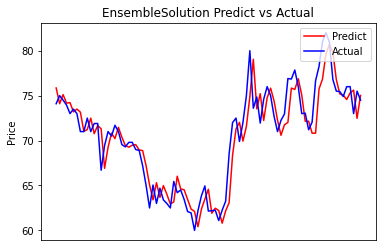

In [64]:
print("Ensemble Solution Model with Original features")
EnsembleModel = EnsembleSolution(ensemble_solution_models)
validate_result(EnsembleModel,'EnsembleSolution')

In [65]:
ensemble_solution_model_fs = [lasso_clf_fs,bay_feat_fs,linear_svr_clf_fs]

print("Ensemble Solution Model with Selected features")
EnsembleModel_fs = EnsembleSolution(ensemble_solution_model_fs)
feature_selected_validate_result(EnsembleModel_fs,'EnsembleSolution with FS')

Ensemble Solution Model with Selected features
EnsembleSolution with FS

RMSE:  2.0477624170527107
R2 score:  0.8541206362647283
----------------------


In [67]:
def train_reg_multipletimes(model, times):
    total_rmse = 0
    total_r2 = 0
    for i in range(times):
        reg = model
        for train_index, test_index in TimeSeriesSplit(n_splits=i+2).split(feature_minmax_transform):
            X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
            y_train, y_test = target_sumas_close[:len(train_index)].values.ravel(), target_sumas_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
            reg.fit(X_train, y_train)
        predicted = reg.predict(validation_X)
        rmse, r2 = print_result(validation_y, predicted, [0,len(validation_y)])
        total_rmse += rmse
        total_r2 += r2
    return total_rmse / times, total_r2 / times

def print_result(actual, predict, index):
    RMSE_score = np.sqrt(mean_squared_error(actual, predict))
    print('From {} to {}'.format(index[0],index[-1]))
    print('RMSE: ', RMSE_score)
    R2_score = r2_score(actual, predict)
    print('R2 score: ', R2_score)
    print('---------------------')
    return RMSE_score, R2_score

In [68]:
print('Benchmark')
t_multiple_benchmark_RMSE,t_multiple_benchmark_R2 = train_reg_multipletimes(benchmark_dt, 7)
print('RMSE: {} //  R2: {}\n'.format(t_multiple_benchmark_RMSE, t_multiple_benchmark_R2))

Benchmark
From 0 to 89
RMSE:  34.32535837382885
R2 score:  -39.98876986691347
---------------------
From 0 to 89
RMSE:  4.736978276120074
R2 score:  0.21938388888494298
---------------------
From 0 to 89
RMSE:  7.174067133553306
R2 score:  -0.7904640158915024
---------------------
From 0 to 89
RMSE:  4.232343135875209
R2 score:  0.3768444521659382
---------------------
From 0 to 89
RMSE:  6.79259962520367
R2 score:  -0.6051172347834539
---------------------
From 0 to 89
RMSE:  7.379224086160979
R2 score:  -0.8943321150078092
---------------------
From 0 to 89
RMSE:  7.212144194403475
R2 score:  -0.8095205790243285
---------------------
RMSE: 10.264673546449368 //  R2: -6.070282210081383



In [69]:
print('LSVR')
t_multiple_LSVR_RMSE,t_multiple_LSVR_R2 = train_reg_multipletimes(linear_svr_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_LSVR_RMSE, t_multiple_LSVR_R2))

LSVR
From 0 to 89
RMSE:  13.345383004507656
R2 score:  -5.195791705586282
---------------------
From 0 to 89
RMSE:  2.403929932714207
R2 score:  0.7989619168912382
---------------------
From 0 to 89
RMSE:  2.2776644482419135
R2 score:  0.8195261802440907
---------------------
From 0 to 89
RMSE:  2.256167247635003
R2 score:  0.8229168229505879
---------------------
From 0 to 89
RMSE:  2.1733161002435115
R2 score:  0.8356837484750588
---------------------
From 0 to 89
RMSE:  2.1087111687214217
R2 score:  0.8453076201501349
---------------------
From 0 to 89
RMSE:  2.1105471655928185
R2 score:  0.8450381300733937
---------------------
 RMSE: 3.8108170096652185 //  R2: -0.03262246954311116


In [70]:
print('Lasso')
t_multiple_lasso_RMSE,t_multiple_lasso_R2 = train_reg_multipletimes(lasso_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_lasso_RMSE, t_multiple_lasso_R2))

Lasso
From 0 to 89
RMSE:  3.883945489517844
R2 score:  0.4752155276305089
---------------------
From 0 to 89
RMSE:  2.2088846381712086
R2 score:  0.8302613303200624
---------------------
From 0 to 89
RMSE:  2.1109864225214476
R2 score:  0.8449736205855498
---------------------
From 0 to 89
RMSE:  2.077514378586116
R2 score:  0.8498508766800129
---------------------
From 0 to 89
RMSE:  2.060537423608445
R2 score:  0.8522948161442098
---------------------
From 0 to 89
RMSE:  2.0506388864907676
R2 score:  0.8537105181338299
---------------------
From 0 to 89
RMSE:  2.0600284761802627
R2 score:  0.8523677727318242
---------------------
 RMSE: 2.3503622450108703 //  R2: 0.7940963517465711


In [71]:
print('Ridge')
t_multiple_ridge_RMSE,t_multiple_ridge_R2 = train_reg_multipletimes(ridge_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_ridge_RMSE, t_multiple_ridge_R2))

Ridge
From 0 to 89
RMSE:  3.3945107205662914
R2 score:  0.5991433492327827
---------------------
From 0 to 89
RMSE:  2.9092372365344636
R2 score:  0.7055625826781593
---------------------
From 0 to 89
RMSE:  2.4232563663669238
R2 score:  0.7957164251773465
---------------------
From 0 to 89
RMSE:  2.5947807356925936
R2 score:  0.765773486316968
---------------------
From 0 to 89
RMSE:  2.6501812879440925
R2 score:  0.7556648827195677
---------------------
From 0 to 89
RMSE:  2.539605780344763
R2 score:  0.7756286824976009
---------------------
From 0 to 89
RMSE:  2.8675411870705023
R2 score:  0.7139420293899554
---------------------
 RMSE: 2.7684447592170898 //  R2: 0.7302044911446258


In [72]:
print('BayRidge')
t_multiple_bayridge_RMSE,t_multiple_bayridge_R2 = train_reg_multipletimes(bay_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_bayridge_RMSE, t_multiple_bayridge_R2))

BayRidge
From 0 to 89
RMSE:  2.7908875022186628
R2 score:  0.7290311388217121
---------------------
From 0 to 89
RMSE:  4.052361397938936
R2 score:  0.42871731173484506
---------------------
From 0 to 89
RMSE:  2.3575718393644283
R2 score:  0.8066409093361123
---------------------
From 0 to 89
RMSE:  2.5692712337937214
R2 score:  0.7703562483579355
---------------------
From 0 to 89
RMSE:  2.5774368458866213
R2 score:  0.7688942293967123
---------------------
From 0 to 89
RMSE:  2.5229604065275653
R2 score:  0.7785602438749566
---------------------
From 0 to 89
RMSE:  3.0509556600187975
R2 score:  0.6761778765106047
---------------------
 RMSE: 2.8459206979641047 //  R2: 0.7083397082904112


In [73]:
print('Ensemble')
t_multiple_ensemble_RMSE,t_multiple_ensemble_R2 = train_reg_multipletimes(EnsembleSolution(ensemble_solution_models), 7)
print(' RMSE: {} //  R2: {}\n'.format(t_multiple_ensemble_RMSE, t_multiple_ensemble_R2))

Ensemble
From 0 to 89
RMSE:  2.5261393214518995
R2 score:  0.7780018668012004
---------------------
From 0 to 89
RMSE:  2.67920023815346
R2 score:  0.7502847469694138
---------------------
From 0 to 89
RMSE:  2.2546454999891195
R2 score:  0.8231556217626461
---------------------
From 0 to 89
RMSE:  2.2869002008270956
R2 score:  0.818059598154358
---------------------
From 0 to 89
RMSE:  2.3427098985852086
R2 score:  0.8090710652691488
---------------------
From 0 to 89
RMSE:  2.2890699311873
R2 score:  0.8177141970901168
---------------------
From 0 to 89
RMSE:  2.516445900555424
R2 score:  0.7797023214024763
---------------------
 RMSE: 2.413587284392787 //  R2: 0.7965699167784802



In [74]:
def cross_validate(model, ts_split):
    clf = model
    total_rmse = 0
    total_r2 = 0
    count = 0
    for train_index, test_index in ts_split.split(validation_X):
        X_test1, X_test2 = validation_X[:len(train_index)], validation_X[len(train_index): (len(train_index)+len(test_index))]
        y_test1, y_test2 = validation_y[:len(train_index)].values.ravel(), validation_y[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        predicted_test1 = clf.predict(X_test1)
        temp1_RMSE, temp1_R2 = print_result(y_test1, predicted_test1, train_index)

        predicted_test2 = clf.predict(X_test2)
        temp2_RMSE, temp2_R2 = print_result(y_test2, predicted_test2, test_index)
        
        total_rmse += temp1_RMSE + temp2_RMSE
        total_r2 += temp1_R2 + temp2_R2
        count += 2
    return total_rmse / count, total_r2 / count


In [75]:
timeseries_cv = TimeSeriesSplit(n_splits=10)
test_bench__RMSE, test_bench_R2 = cross_validate(benchmark_dt,timeseries_cv)

From 0 to 8
RMSE:  11.406684580613874
R2 score:  -71.52847923591078
---------------------
From 9 to 16
RMSE:  8.888069762304145
R2 score:  -25.49851251728732
---------------------
From 0 to 16
RMSE:  10.298470334418349
R2 score:  -25.196783020721135
---------------------
From 17 to 24
RMSE:  8.034009389671256
R2 score:  -75.38874325397181
---------------------
From 0 to 24
RMSE:  9.631940211354758
R2 score:  -22.192323277620726
---------------------
From 25 to 32
RMSE:  3.1375235841641596
R2 score:  -3.6285022661073194
---------------------
From 0 to 32
RMSE:  8.524668730446821
R2 score:  -4.686231094474269
---------------------
From 33 to 40
RMSE:  2.837030595445258
R2 score:  -2.058226469843808
---------------------
From 0 to 40
RMSE:  7.7499003622285025
R2 score:  -2.410929168438714
---------------------
From 41 to 48
RMSE:  2.42054871304807
R2 score:  -3.640987467336446
---------------------
From 0 to 48
RMSE:  7.156232661230089
R2 score:  -1.6428551561403366
---------------------


In [76]:
test_lsvr__RMSE, test_lsvr_R2 = cross_validate(lsvr_grid_search_feat,timeseries_cv)

From 0 to 8
RMSE:  1.4489930107302116
R2 score:  -0.17036759222450404
---------------------
From 9 to 16
RMSE:  2.04068663576289
R2 score:  -0.396880410437745
---------------------
From 0 to 16
RMSE:  1.7525014436405084
R2 score:  0.2413887355481057
---------------------
From 17 to 24
RMSE:  0.6523015574537416
R2 score:  0.49642805574781457
---------------------
From 0 to 24
RMSE:  1.4915149458749346
R2 score:  0.4438756399312973
---------------------
From 25 to 32
RMSE:  2.13348934046047
R2 score:  -1.1401658868807267
---------------------
From 0 to 32
RMSE:  1.6699631185464285
R2 score:  0.7817856821119237
---------------------
From 33 to 40
RMSE:  1.606025528400343
R2 score:  0.01995392724585565
---------------------
From 0 to 40
RMSE:  1.6576811526218371
R2 score:  0.8439432844243727
---------------------
From 41 to 48
RMSE:  1.5188243171333284
R2 score:  -0.8272493872599553
---------------------
From 0 to 48
RMSE:  1.635815950705774
R2 score:  0.8619064686322635
------------------

In [77]:
test_ridge__RMSE, test_ridge_R2 = cross_validate(ridge_clf_feat,timeseries_cv)

From 0 to 8
RMSE:  1.090742287458341
R2 score:  0.3368160488100338
---------------------
From 9 to 16
RMSE:  2.456494707910757
R2 score:  -1.0241293022570979
---------------------
From 0 to 16
RMSE:  1.8626735787855355
R2 score:  0.14300946177757723
---------------------
From 17 to 24
RMSE:  1.5360889698347013
R2 score:  -1.7925273572138676
---------------------
From 0 to 24
RMSE:  1.764754410390067
R2 score:  0.22145225406022828
---------------------
From 25 to 32
RMSE:  1.4076619375069084
R2 score:  0.06832762592195618
---------------------
From 0 to 32
RMSE:  1.6851494877240203
R2 score:  0.7777988262252162
---------------------
From 33 to 40
RMSE:  1.4178377393675534
R2 score:  0.23617359391592618
---------------------
From 0 to 40
RMSE:  1.6364235326647978
R2 score:  0.8479200729606916
---------------------
From 41 to 48
RMSE:  2.2908031359726904
R2 score:  -3.1567918630898726
---------------------
From 0 to 48
RMSE:  1.759959375521893
R2 score:  0.8401510658077431
---------------

In [78]:
test_lasso__RMSE, test_lasso_R2 = cross_validate(lasso_clf_feat,timeseries_cv)

From 0 to 8
RMSE:  1.1145289562559981
R2 score:  0.3075755116695085
---------------------
From 9 to 16
RMSE:  2.2137721403110233
R2 score:  -0.6438887433155884
---------------------
From 0 to 16
RMSE:  1.7215907463180633
R2 score:  0.26791356864100124
---------------------
From 17 to 24
RMSE:  0.7415056944225892
R2 score:  0.3492807174140675
---------------------
From 0 to 24
RMSE:  1.4803312524110916
R2 score:  0.45218424821650627
---------------------
From 25 to 32
RMSE:  1.886809356579055
R2 score:  -0.673873080846652
---------------------
From 0 to 32
RMSE:  1.588451807781085
R2 score:  0.8025679886754353
---------------------
From 33 to 40
RMSE:  1.4471974727703547
R2 score:  0.20421234983037084
---------------------
From 0 to 40
RMSE:  1.561893441352687
R2 score:  0.8614574217688644
---------------------
From 41 to 48
RMSE:  1.4931869906976143
R2 score:  -0.766083106685705
---------------------
From 0 to 48
RMSE:  1.550883981774232
R2 score:  0.8758739088673092
------------------

In [79]:
test_bay_RMSE, test_bay_R2 = cross_validate(bay_feat,timeseries_cv)

From 0 to 8
RMSE:  1.1023142450756405
R2 score:  0.32266963468082077
---------------------
From 9 to 16
RMSE:  2.5522557018958
R2 score:  -1.18501766144044
---------------------
From 0 to 16
RMSE:  1.925799201507338
R2 score:  0.0839387280966889
---------------------
From 17 to 24
RMSE:  1.5945572419712255
R2 score:  -2.0091575301667746
---------------------
From 0 to 24
RMSE:  1.8263498676905274
R2 score:  0.16615629435610801
---------------------
From 25 to 32
RMSE:  1.3862619665105693
R2 score:  0.09643978753185911
---------------------
From 0 to 32
RMSE:  1.729973058983431
R2 score:  0.7658208835266958
---------------------
From 33 to 40
RMSE:  1.5333499799116548
R2 score:  0.10664476264927669
---------------------
From 0 to 40
RMSE:  1.6934012618989613
R2 score:  0.8371453284041621
---------------------
From 41 to 48
RMSE:  2.4286818865793918
R2 score:  -3.67222779763346
---------------------
From 0 to 48
RMSE:  1.8336975405204772
R2 score:  0.8264758749224373
--------------------

In [80]:
test_ensemble_RMSE, test_ensemble_R2 = cross_validate(EnsembleSolution(ensemble_solution_models),timeseries_cv)

From 0 to 8
RMSE:  0.9384191188295646
R2 score:  0.5091108864896465
---------------------
From 9 to 16
RMSE:  2.3261669291641844
R2 score:  -0.8150489437021198
---------------------
From 0 to 16
RMSE:  1.7356825177630497
R2 score:  0.255879795588403
---------------------
From 17 to 24
RMSE:  1.1535466734080415
R2 score:  -0.5748349243221815
---------------------
From 0 to 24
RMSE:  1.5730156269256428
R2 score:  0.38143865886044526
---------------------
From 25 to 32
RMSE:  1.4865798347520933
R2 score:  -0.03906557699428381
---------------------
From 0 to 32
RMSE:  1.5525034612223099
R2 score:  0.8114030619308896
---------------------
From 33 to 40
RMSE:  1.3284037275882725
R2 score:  0.32949537892956193
---------------------
From 0 to 40
RMSE:  1.5113881731891918
R2 score:  0.8702723646441305
---------------------
From 41 to 48
RMSE:  1.9699827041718518
R2 score:  -2.074026221733909
---------------------
From 0 to 48
RMSE:  1.595291013373695
R2 score:  0.868663845575756
---------------

In [81]:
print('Benchmark RMSE: {} // Benchmark R2: {}'.format(test_bench__RMSE, test_bench_R2))
print('LSVR RMSE: {} // LSVR R2: {}'.format(test_lsvr__RMSE, test_lsvr_R2))
print('Lasso RMSE: {} // Lasso R2: {}'.format(test_lasso__RMSE, test_lasso_R2))
print('bayesian ridge RMSE: {} // Bayesian ridge R2: {}'.format(test_bay_RMSE, test_bay_R2))

print('Ensemble RMSE: {} // Ensemble R2: {}'.format(test_ensemble_RMSE, test_ensemble_R2))

Benchmark RMSE: 7.220984020832377 // Benchmark R2: -17.105280336747178
LSVR RMSE: 1.8772889575128722 // LSVR R2: 0.14220085781113195
Lasso RMSE: 1.8609810608394433 // Lasso R2: 0.1430772674553073
bayesian ridge RMSE: 2.5003365807855182 // Bayesian ridge R2: -0.7871776147443722
Ensemble RMSE: 2.122833239215434 // Ensemble R2: -0.1686456582500993
